ここでは、教師なし学習と呼ばれる種類の機械学習アルゴリズムを見ていく。教師なし学習には、アルゴリズムの学習に教師情報を用いないすべての種類の機械学習が含まれる。教師なし学習では、アルゴリズムには入力データだけが与えられ、データから知識を抽出することが要求される。

# 3.1 教師なし学習の種類

本章では、2種類の教師なし学習を見ていく。データセットの変換とクラスタリングである。

データセットの__教師なし変換__(Unsupervised transformations)は、もとのデータ表現を変換して、人間やほかの機械学習アルゴリズムにとって、よりわかりやすい新しいデータ表現を作るアルゴリズムのことだ。教師なし変換の利用法として最も一般的なのは次元削減だ。次元削減とは、たくさんの特徴量で構成されるデータの高次元表現を入力として、少量の本質的な特徴を表す特徴量でそのデータを表す要約方法を見つけることだ。次元削減は、可視化のために次元数を2次元に減らす際にも用いられる。

もう1つの教師なし変換のアプリケーションとして、そのデータを「構成する」部品、もしくは成分を見つけることが挙げられる。

# 3.2 教師なし学習の難しさ

教師なし学習の難しさは、アルゴリズムが学習したことの有用性の評価にある。教師なし学習のアルゴリズムにはラベル情報がまったく含まれていないデータが与えられる。このため、出力がどうあるべきなのかわからない。したがって、モデルが「よくやった」のかどうか判断するのがとても難しい。例えば、あるクラスタリングアルゴリズムが、プロフィール写真を、顔だけが大きく写ったものとそうでないものにグループ分けしたとしよう。この方法も顔写真の集合をグループ分けする方法の1つではあるが、我々が求めているものではない。しかし、アルゴリズムに我々が何を求めているのかを「教える」方法がないので、教師なし学習の結果を評価するには、結果を人間が確かめるしかない場合が多い。

# 3.3 前処理とスケール変換

前章で、ニューラルネットワークやSVMなどのアルゴリズムは、データのスケール変換に非常に敏感であることを見た。したがって、これらのアルゴリズムに適したデータ表現に変換することが広く行われている。よく使われるのは、特徴量ごとにスケールを変更してずらす方法である。下のコードは、図3-1に示す簡単な例を表示する。

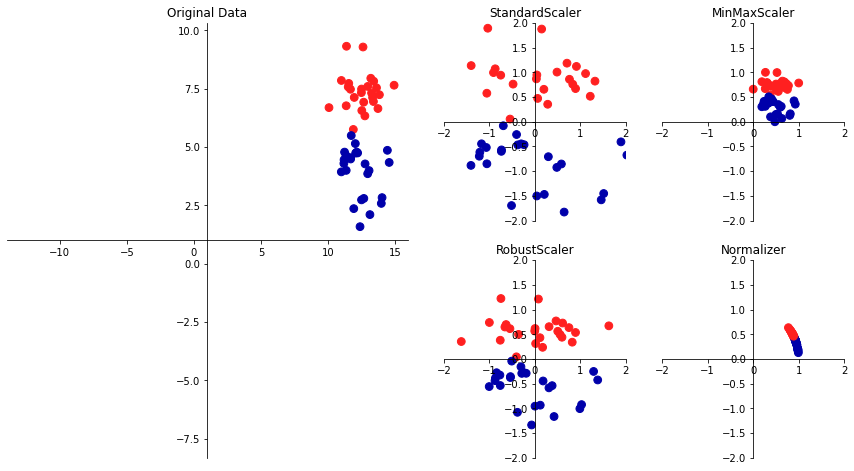

In [3]:
import mglearn
mglearn.plots.plot_scaling()

図3-1 データセットに対するさまざまなスケール変換と前処理結果

## 3.3.1 さまざまな前処理

図3-1の左のプロットは、2特徴量の2クラス分類合成データセットである。第1の特徴量（x軸）は10から15の間に、第2の特徴量（y軸）は1から9の間にある。

## 3.3.2 データ変換の適用

さまざまな変換を説明したので、scikit-learnを用いて実際に適用してみよう。__「2章 教師あり学習」__に登場したcancerデータセットを用いる。スケール変換器などの前処理手法は、教師あり学習アルゴリズムを適用する前に用いる。例として、カーネル法を用いたSVM(SVC)をcancerデータセットに適用し、MinMaxScalerを前処理に用いることにしよう。まず、データセットをロードして訓練セットとテストセットに分割する（前処理した後に構築する教師ありモデルを評価するために、訓練セットとテストセットに分けておく必要がある）。

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


復習になるが、このデータセットには30の測定結果を表す569のデータポイントがある。これを、訓練セット426サンプルと、テストセット143サンプルに分割した。

教師ありモデルを作った際と同じように、まず前処理を実装したクラスをインポートし、インスタンスを生成する。

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

次に、fitメソッドを訓練データに適用して、スケール変換器を適合させる。MinMaxScalerの場合は、fitメソッドは訓練データ中の各特徴量の最小値と最大値を計算する。__「2章 教師あり学習」__で見たクラス分類器や回帰と異なり、スケール変換器のfitメソッドにはデータ（X_train）のみを与え、y_trainは用いない。

In [7]:
scaler.fit(X_train)

MinMaxScaler()

学習した変換を適用するには、つまり実際に訓練データを__スケール変換__するには、スケール変換器のtransformメソッドを用いる。scikit-learnでは、モデルが新しいデータ表現を返す際には常にtransformメソッドが用いられる。

In [8]:
# データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


変換されたデータの配列はもとのデータのものと同じ形をしている。特徴量がシフトされ、スケール変換されているだけだ。すべての特徴量が、望んだ通り0と1の間になっているのがわかるだろう。

SVMをスケール変換されたデータに適用するには、テストセットの方も変換する必要がある。ここでもtransformメソッドを用いるが、今度はX_testに適用する。

In [9]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
# スケール変換の前後のデータ特性をプリント
print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


驚くかもしれないが、テストセットの場合には、スケール変換後の最小値と最大値が0と1になっていない。特徴量によっては0と1の範囲から出てしまっている。これは、MinMaxScalerが（他のスケール変換器もそうだが）常に訓練データとテストデータに、まったく同じ変換を施すからだ。transformは常に訓練データの最小値を引き、訓練データのレンジで割る。これらの値は、テストセットの最小値やレンジとは違う場合もあるのだ。

## 3.3.3 訓練データとテストデータを同じように変換する

教師ありモデルをテストセットに対して適用する際に、テストセットを訓練セットとまったく同じように変換することは重要である。下の例は、テストセットの最小値とレンジを使うと何が起こるかを示している（__図3-2__）。

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

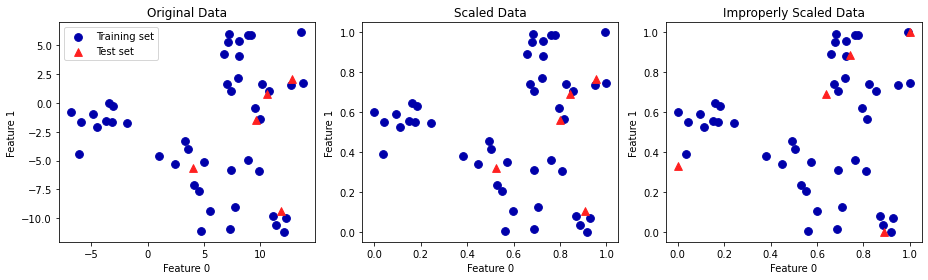

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0,1になる。ここでは説明のためにわざとやっている
# *実際にはやってはいけない！*
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

図3-2 訓練データとテストデータに対するスケール変換の効果。左のデータを同時にスケール変換したもの（中央）と、別々に変換したもの（右）

最初のパネルは、変換されていない2次元のデータセットである。訓練セットは丸で、テストセットは三角形で表されている。2つ目のパネルは同じデータをMinMaxScalerで変換したものである。ここでは、訓練セットに対してfitしたものを使って、訓練セットとテストセットをtransformしている。2つ目のパネルのデータセットは、グラフ軸の目盛りが変わっただけで、最初のものとまったく同じに見える。すべての特徴量が0と1の間にあるわけではない。テストデータ（三角形）の最小値と最大値は0と1ではない。

3つ目のパネルは、訓練セットとテストセットを別々に変換した場合を示している。この場合、特徴量の最小値と最大値は、訓練セットもテストセットも0と1になっている。しかし、データセットが変わってしまっている。テストデータポイントと訓練データポイントが別々に変換されているので、お互いに対して動いてしまっている。データを勝手に動かしてしまったのだ。明らかにこれではまずい。

別の考え方をしてみよう。テストセットが1点しかなかったらどうだろうか？MinMaxScalerの最大値最小値に対する要求を満たすように、1点をスケール変換する方法はない。しかし、テストセットの大きさによって前処理の方法を変更するのはおかしいだろう。

### 効率のいいショートカット

あるデータセットに対して、モデルをfitしてから、transformしたいことはよくある。これは非常に一般的で、fitを呼び出してからtransformを呼び出すよりも効率的に計算できる場合がある。このような場合のために、transformメソッドを持つすべてのモデルにはfit_transformメソッドが用意されている。StandardScalerの例を見てみよう。

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitとtransformを続けて呼ぶ（メソッドチェーンを使って）
X_scaled = scaler.fit(X).transform(X)
# 同じ結果になるがより効率的に計算される
X_scaled_d = scaler.fit_transform(X)

fit_transformはすべてのモデルに対して効率的なわけではないが、訓練データを変換する際には使ってもよいだろう。

## 3.3.4 教師あり学習における前処理の結果

さて、cancerデータセットに戻って、SVCの学習に対するMinMaxScalerの効果を見てみよう（__「2章 教師あり学習」__で同じ変換をしているが、ここでは別のやり方で行う）。まず、比較のためにもとのデータに対して再びSVCを訓練する。

In [13]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


さて、今度はSVCに掛ける前に」、MinMaxScalerを使ってスケール変換してみよう。

In [14]:
# 0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


ここで示したように、データに対するスケール変換の影響は非常に大きい。スケール変換には複雑な数学は使われていないが、自分で再実装するよりは、scikit-learnが用意しているスケール変換機構を使ったほうがよいだろう。簡単な計算でも間違ってしまうことは多いからだ。

さらに、前処理のアルゴリズムを置き換えるのも、利用するクラスを変えるだけでできる。前処理のクラスはどれも、fitメソッドとtransformメソッドの同じインタフェースを持つからだ。

In [15]:
# 平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


ここまでは、前処理のためのデータ変換が簡単に使えることを説明した。次は、教師なし学習を用いたもっと面白いデータ変換を見ていこう。

# 3.4 次元削減、特徴量抽出、多様体学習

先に述べた通り、教師なし学習を用いたデータ変換にはさまざまな動機がある。最も一般的な動機としては、可視化、データの圧縮、以降の処理に適した表現の発見が挙げられる。

これらすべての目的に対してもっともよく用いられるアルゴリズムが、主成分分析（principal component analysis：PCA）だ。ここでは主成分分析の他に、あつ2つのアルゴリズムを見ていく。主に特徴量抽出に用いられる非負値行列因子分解（non-negative matrix factorization：NMF）と、2次元散布図を用いたデータの可視化によく用いられるt-SNEである。

## 3.4.1 主成分分析（PCA）

主成分分析とは、データセットの特徴量を相互に統計的に関連しないように回転する手法である。多くの場合、回転したあとの特徴量から、データセットを説明するのに重要な一部の特徴量だけを抜き出す。__図3-3__にPCAを合成2次元データセットに適用した例を示す。

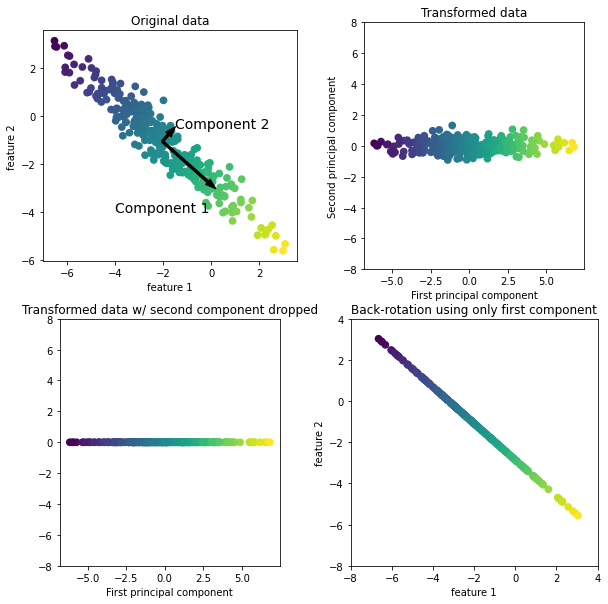

In [16]:
mglearn.plots.plot_pca_illustration()

図3-3 PCAを用いたデータ変換

最初のプロット（左上）は、もとのデータセットを示している。区別がつきやすいように色が付けてある。このアルゴリズムは、まず最も分散が大きい方向を見つけ、それに「第1成分」というラベルを付ける。データはこの方向（もしくはベクトル）に対して最も情報を持つ。つまりこの方向は、特徴量が最も相互に関係する方向である。

2つ目のプロット（右上）は、同じデータを、最初の主成分がx軸に沿い、2つ目の主成分がy軸に沿うように回転させたものである。